In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
import keras

Using TensorFlow backend.


In [9]:
from keras.datasets.mnist import load_data
mnist = load_data()

11493376/11490434 [==============================] - 13s 1us/step


# Binary classification

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

<p class = 'note'>Logistic regression classifier</p>

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV`
from sklearn.linear_model import LogisticRegression

log = make_pipeline(StandardScaler(), LogisticRegression(solver = 'lbfgs', max_iter = 1000))
grid_params = {'logisticregression__C' : [.01, .1, 1, 10, 100]}
grid = GridSearchCV(log, grid_params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,
                                                    

In [17]:
'best cross-validation score: %.2f' % grid.best_score_

'best cross-validation score: 0.98'

In [18]:
grid.best_params_

{'logisticregression__C': 10}

In [19]:
log_clf = grid.best_estimator_

<p class = 'note'> Support vector machine</p>

In [23]:
from sklearn.svm import SVC
pipe = make_pipeline(StandardScaler(), SVC())
params = [
    {'svc__kernel' : ['linear'], 
     'svc__C' : [.001, .01, .1, 1, 10, 100]},
    {'svc__kernel' : ['rbf'],
     'svc__C' : [.001, .01, .1, 10, 100],
     'svc__gamma': [.01, .1, 1, 10, 100]}
]
grid = GridSearchCV(pipe, params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
        

In [25]:
'SVC best cross-validation score: %.2f' % grid.best_score_

'SVC best cross-validation score: 0.98'

In [26]:
grid.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [27]:
svm_clf = grid.best_estimator_

## Performance Measures

### Cross-validation

In [31]:
from sklearn.model_selection import cross_val_score
log_score = cross_val_score(log_clf, cancer.data, cancer.target, cv = 10)
svm_score = cross_val_score(svm_clf, cancer.data, cancer.target, cv = 10)
print('logistic regression: {}'.format(log_score.mean()))
print('svm: {}'.format(svm_score.mean()))

logistic regression: 0.9754969319851352
svm: 0.9789754558810818


### Precision

In [32]:
from sklearn.metrics import precision_score
log_precision_score = precision_score(log_clf.predict(X_test), y_test)
svm_precision_score = precision_score(svm_clf.predict(X_test), y_test)

In [35]:
print('svm: {}'.format(svm_precision_score))
print('log: {}'.format(log_precision_score))

svm: 0.9887640449438202
log: 0.9662921348314607


### Recall

In [36]:
from sklearn.metrics import recall_score
log_recall_score = recall_score(log_clf.predict(X_test), y_test)
svm_recall_score = recall_score(svm_clf.predict(X_test), y_test)

In [37]:
print('svm: {}'.format(svm_recall_score))
print('log: {}'.format(log_recall_score))

svm: 0.9777777777777777
log: 0.9885057471264368


<p class = 'note'>If we are interested more in predicting peole who have breast cancer, then <code>Logistic regression</code> might be a beter model to go to because it have higher <span class = 'tag'>recall score</span>.

### Confusion Matrix

Text(0.5, 1.0, 'support vector machine')

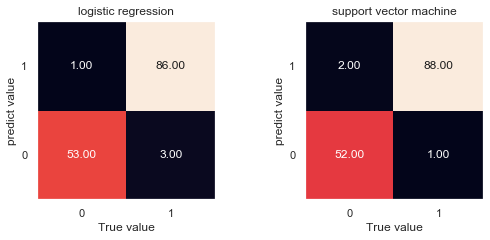

In [49]:
from sklearn.metrics import confusion_matrix
log_pred = log_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)


def plot_confusion_matrix(y_pred, y_test, ax):
    matrix = confusion_matrix(y_test, y_pred)
    mglearn.tools.heatmap(matrix.T, ax = ax, xlabel = 'True value', ylabel = 'predict value', xticklabels = [0,1], yticklabels= [0,1])
    

fig, axes = plt.subplots(1,2,figsize = (8, 5), subplot_kw = {'xticks':[], 'yticks' : []}, gridspec_kw = {'wspace' : .5})

plot_confusion_matrix(log_pred, y_test, axes[0])
plot_confusion_matrix(svm_pred, y_test, axes[1])
axes[0].set_title('logistic regression')
axes[1].set_title('support vector machine')

### precision recall curve

In [66]:
from sklearn.metrics import precision_recall_curve
def plot_prc(model, name):
    y_ = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_)
#     print(len(precision), len(recall), len(thresholds))
    plt.plot(thresholds, precision[:-1], label = '%s precision' % name)
    plt.plot(thresholds, recall[:-1], label = '%s recall' % name)
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    

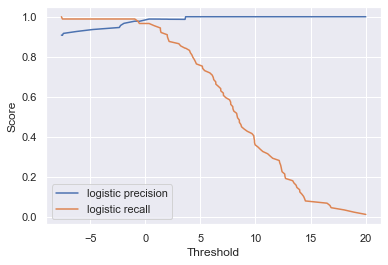

In [67]:
plot_prc(log_clf, 'logistic')

### ROC curve

In [78]:
from sklearn.metrics import roc_curve
def plot_roc(model, name, ls):
    y_ = model.decision_function(X_test)
    fpt, tpr, thresholds = roc_curve(y_test, y_)
    plt.plot(fpt, tpr, label = name, ls = ls, alpha = .5)

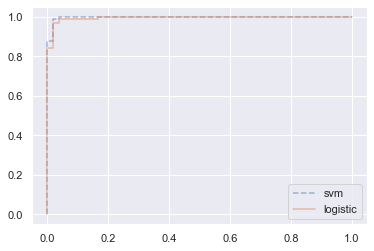

In [79]:
plot_roc(svm_clf, 'svm', '--')
plot_roc(log_clf, 'logistic', '-')
plt.legend()

<p class = 'note'>In general, the performace of <code>SVC</code> and <code>Logistic regression</code> are about the same, there's only a slicely small difference.

### AUC

In [80]:
from sklearn.metrics import roc_auc_score
svm_auc = roc_auc_score(y_test, svm_clf.decision_function(X_test))
log_auc = roc_auc_score(y_test, log_clf.decision_function(X_test))

print('SVM: {}'.format(svm_auc))
print('Logistic: {}'.format(log_auc))

SVM: 0.9975031210986267
Logistic: 0.9950062421972534


<span class = 'warning'>NOTE:</span>
<p>
Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).
</p>

# Multiclass classification

## One-versus-One and One-versus-Rest

In [81]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

<pre>
For example, one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the <code>one-versus-all (OvA)</code> strategy
(also called <code>one-versus-the-rest</code>).
Another strategy is to train a binary classifier for every pair of digits: one to distin‐
guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the <code>one-versus-one (OvO)</code> strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advan‐
tage of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish.
Some algorithms (such as <b>Support Vector Machine classifiers</b>) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred.
</pre>


In [86]:
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 6, train_size = .8)
clf = OneVsOneClassifier(make_pipeline(StandardScaler(), SVC(gamma = 'auto')))
clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=Pipeline(memory=None,
                                      steps=[('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svc',
                                              SVC(C=1.0, cache_size=200,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3, gamma='auto',
                                                  kernel='rbf', max_iter=-1,
                                                  probability=False,
                                                  random_state=None,
                                                  shrinking=True, tol=0.001,
     

In [87]:
clf.score(X_test, y_test)

0.9833333333333333

In [88]:
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.97586207, 0.98958333, 0.97569444, 0.98601399, 0.96491228])

## Error Analysis

In [89]:
from sklearn.model_selection import cross_val_predict
cross_val_predict?